# Principle Component Analysis (PCA)

**Motivation**

Dimensionality reduction is a fundamental concept in machine learning, aiming to exploit relationships among points in high-dimensional space in order to construct some low-dimensional summaries. By doing so, this process eliminates redundancies, while preserving interesting characteristics of the data.In essence, we are taking datasets with a large number of columns and 'reducing' the number of columns in order to visualize and develop inferences around our data. Lets take a general overview of how to work with PCA with a dataset.

In [49]:
import numpy as np
import pandas as pd
import random as rm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import seaborn as sns

# General PCA method

In [50]:
# CSV into pandas dataframe
df = pd.read_csv(r'C:\Users\caryk\Downloads\archive (2).zip')
df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [51]:
## Shape of our dataframe
df.shape

(187, 15)

Lets find the correlation matrix for future uses. The correlation matrix is defined below, with X is a matrix with numerical values. Although small x seems to be a matrix, imagine we are subtracticing each column by the mean of each column. Thus each column is mean 0 in our X-x matrix.

$$
\boldsymbol{C} = \frac{1}{n}(\boldsymbol{X} - \bar{\boldsymbol{x}})^\top (\boldsymbol{X}-\bar{\boldsymbol{x}})
$$

Notice that the diagonal contains only one value, as Cov(I,I) is equal to the Var(I) which is 1 as we have standardized our matrix

**Step 1**

**Clean data and get dataset in Matrix form**.Here we are working with country-wise COVID-19 data. Our goal is to analyze and visualize the relationships between our entries. Since PCA works with numerical data, lets drop all categorical data.

In [53]:
df.shape

(187, 15)

In [54]:
## Drop Categorical/Redundent data
df = df.drop(['Country/Region','WHO Region','Deaths / 100 Recovered'], axis = 1)
## Drop

In [55]:
##Drop rows with na values
df.dropna()
df.shape

(187, 12)

In [56]:
## DF to matrix
dfmatrix = df.to_numpy()
dfmatrix

array([[3.6263e+04, 1.2690e+03, 2.5198e+04, ..., 3.5526e+04, 7.3700e+02,
        2.0700e+00],
       [4.8800e+03, 1.4400e+02, 2.7450e+03, ..., 4.1710e+03, 7.0900e+02,
        1.7000e+01],
       [2.7973e+04, 1.1630e+03, 1.8837e+04, ..., 2.3691e+04, 4.2820e+03,
        1.8070e+01],
       ...,
       [1.6910e+03, 4.8300e+02, 8.3300e+02, ..., 1.6190e+03, 7.2000e+01,
        4.4500e+00],
       [4.5520e+03, 1.4000e+02, 2.8150e+03, ..., 3.3260e+03, 1.2260e+03,
        3.6860e+01],
       [2.7040e+03, 3.6000e+01, 5.4200e+02, ..., 1.7130e+03, 9.9100e+02,
        5.7850e+01]])

**Step 2**

**Center/Standardize your matrix.** We want to do this in order to convert our data into the same units. This simply converting all our columns into mean 0 and 1 variance/SD vectors.We can do this in multiple way. Lets show this first show how to do it manually and next how to do it using scikit learn library.

In [67]:
#Subtracted each column by their means
subtractedbymean = df - np.mean(df)
#Divided each column by their standard deviations
standardized = subtractedbymean/np.std(subtractedbymean)

Lets check if our Matrix is standardized by checking that the mean of each column is equal to 0, and the standard deviations are equal to 1.

In [68]:
np.mean(standardized)

Confirmed               -9.499234e-18
Deaths                   5.937022e-18
Recovered                2.374809e-17
Active                   4.749617e-18
New cases               -4.749617e-18
New deaths               2.018587e-17
New recovered           -1.424885e-17
Deaths / 100 Cases       2.493549e-16
Recovered / 100 Cases    2.707282e-16
Confirmed last week      1.424885e-17
1 week change            2.374809e-17
1 week % increase        9.380494e-17
dtype: float64

In [69]:
np.std(standardized)

Confirmed                1.0
Deaths                   1.0
Recovered                1.0
Active                   1.0
New cases                1.0
New deaths               1.0
New recovered            1.0
Deaths / 100 Cases       1.0
Recovered / 100 Cases    1.0
Confirmed last week      1.0
1 week change            1.0
1 week % increase        1.0
dtype: float64

**Nice!**

**Step 3**

Calculate Covariance Matrix. The formula for the covariance matrix is defined below. 
$$
\boldsymbol{C}_{jk} = \frac{1}{n}\sum_{i=1}^n (x_{ij} - \bar{x}_j)(x_{ik} - \bar{x}_k).
$$

Although the formula above seems a bit complicated, we can break it down in terms of our dataset above. Our covariance matrix is 
12 x 12 matrix. Where the j,kth entry of the matrix is the pairwise covarariances between the jth and kth feature. Thus, this is also the same as the k,jth feature, meaning our matrix is symmetric. In terms of the formula, we are taking the sum of the products of the deviations for each observation, and averaging it.

**However, since we have already standardized our matrix, the covariance matrix is simply the correlation matrix. Lets prove this.**

In [74]:
## We are taking the transpose of X and multiplying it by X. Since the mean of each column is 0, we don't need to worry about subtracting by the mean
manualcomputation = 1/standardized.shape[0] * np.dot(standardized.T,standardized)


array([[ 1.        ,  0.93469843,  0.90637675,  0.92701827,  0.9097199 ,
         0.87168272,  0.85925242,  0.06355041, -0.06481518,  0.99912716,
         0.95470982, -0.01016071],
       [ 0.93469843,  1.        ,  0.83209827,  0.87158592,  0.80697451,
         0.81416116,  0.7651139 ,  0.25156536, -0.11452911,  0.93908218,
         0.85532972, -0.03470762],
       [ 0.90637675,  0.83209827,  1.        ,  0.68210265,  0.81894185,
         0.82033828,  0.91920345,  0.04843819,  0.02660987,  0.89931204,
         0.91001284, -0.01369704],
       [ 0.92701827,  0.87158592,  0.68210265,  1.        ,  0.85119047,
         0.78112277,  0.67388703,  0.05437971, -0.13261799,  0.9314586 ,
         0.84764211, -0.00375199],
       [ 0.9097199 ,  0.80697451,  0.81894185,  0.85119047,  1.        ,
         0.93594658,  0.9147646 ,  0.02010425, -0.07866557,  0.89608352,
         0.95999298,  0.03079057],
       [ 0.87168272,  0.81416116,  0.82033828,  0.78112277,  0.93594658,
         1.        ,  

Lets compare this to pandas built in correlation method.

Text(0.5, 1.0, 'Correlation between different fearures')

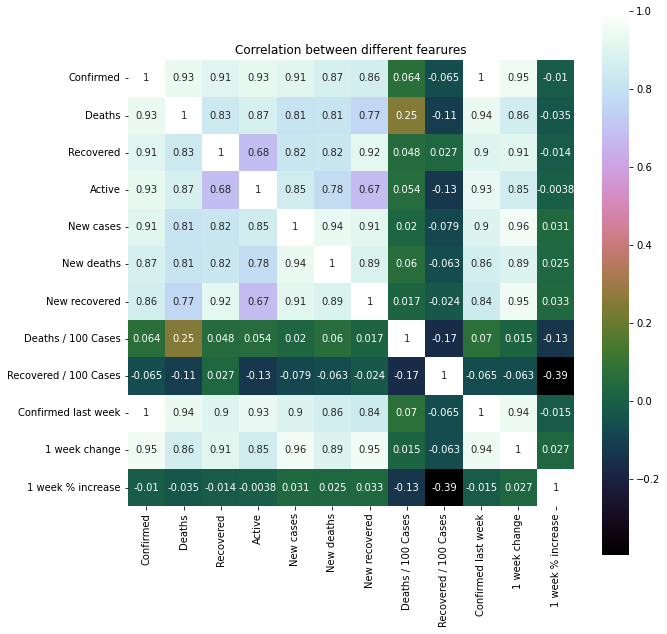

In [77]:
## Correlation matrix

correlation = df.corr()
plt.figure(figsize=(10,10))

## Used seaborn to better visualize our correlation coefficient
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

**You can see that these two correlation matrices are the same!** In general,to find the correlation matrix without a standardized matrix, we can first find the covariance matrix and divide by the product of the pairwise standard deviations.

**Step 4**

**Eigenvalue decomposition on correlation matrix.** Next, we apply an eigenvalue decomposition on our correlation matrix



In [105]:
eigenvals, eigenvecs = np.linalg.eig(correlation)
print('Eigenvectors \n%s' %eigenvecs)
print('\nEigenvalues \n%s' %eigenvals)

Eigenvectors 
[[-3.48226820e-01+0.00000000e+00j  1.56171150e-02+0.00000000e+00j
  -4.57841916e-03+0.00000000e+00j -9.53288427e-02+0.00000000e+00j
  -1.70040769e-01+0.00000000e+00j -1.65070207e-01+0.00000000e+00j
   7.56348206e-02+0.00000000e+00j  2.20971508e-01+0.00000000e+00j
  -3.52266478e-02+0.00000000e+00j  6.41712994e-02+0.00000000e+00j
  -3.57686992e-01-4.34025447e-01j -3.57686992e-01+4.34025447e-01j]
 [-3.26331871e-01+0.00000000e+00j -1.33527943e-02+0.00000000e+00j
  -2.01411127e-01+0.00000000e+00j -6.60884412e-02+0.00000000e+00j
  -2.71004267e-01+0.00000000e+00j -2.69160835e-01+0.00000000e+00j
  -4.36944426e-01+0.00000000e+00j -6.88096760e-01+0.00000000e+00j
   1.84808301e-01+0.00000000e+00j -5.09833185e-02+0.00000000e+00j
  -1.54518889e-02+1.59652020e-02j -1.54518889e-02-1.59652020e-02j]
 [-3.24029324e-01+0.00000000e+00j  7.80660732e-02+0.00000000e+00j
   5.07900442e-02+0.00000000e+00j  2.42640643e-01+0.00000000e+00j
   2.06143341e-01+0.00000000e+00j -5.74715320e-01+0.00000000

In [106]:
#Sorting by eigenvalues by putting them eigenvalue/eigenvector pairs into tuples

eigenpair = [(np.abs(eigenvals[i]), eigenvecs[:,i])for i in np.arange(len(eigenvals))]

#Actual Sorting

eigenpair.sort(key=lambda x: x[0], reverse=True)





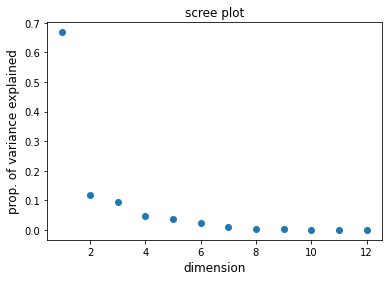

In [110]:
# Retrieve my eigenvals and eigenvectors in sorted form
eigenvals = [eigenpair[i][0] for i in np.arange(len(eigenpair))]
eigenvects = [[eigenpair[i][1] for i in np.arange(len(eigenpair))]]


# Create a scree plot to determine
plt.scatter(range(1,len(eigenvals)+1), eigenvals/np.sum(eigenvals))
plt.xlabel('dimension', fontsize=12)
plt.ylabel('prop. of variance explained', fontsize=12)
plt.title('scree plot', fontsize=12)
plt.show()


As you can see, a majority of the captured variance comes from the first few dimensions, with the first 4 capturing more than 90 percent of the variance.

**Step 5**


**Choose the number of principle components**. For visualization purposes, we choose the first two principle components.






In [111]:
df

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Confirmed last week,1 week change,1 week % increase
0,36263,1269,25198,9796,106,10,18,3.50,69.49,35526,737,2.07
1,4880,144,2745,1991,117,6,63,2.95,56.25,4171,709,17.00
2,27973,1163,18837,7973,616,8,749,4.16,67.34,23691,4282,18.07
3,907,52,803,52,10,0,0,5.73,88.53,884,23,2.60
4,950,41,242,667,18,1,0,4.32,25.47,749,201,26.84
...,...,...,...,...,...,...,...,...,...,...,...,...
182,10621,78,3752,6791,152,2,0,0.73,35.33,8916,1705,19.12
183,10,1,8,1,0,0,0,10.00,80.00,10,0,0.00
184,1691,483,833,375,10,4,36,28.56,49.26,1619,72,4.45
185,4552,140,2815,1597,71,1,465,3.08,61.84,3326,1226,36.86


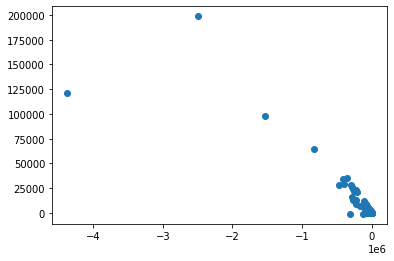

In [117]:
#compute pcs by projecting the data onto the first three eigenvectors

z1 = np.dot(df, eigenvecs[:,0])
z2 = np.dot(df, eigenvecs[:,1])

plt.scatter(z1,z2)